<a href="https://colab.research.google.com/github/stefsyrsiri/forbes2000-data-analysis/blob/main/Legal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legal Data

## Claim settlements for the City of Austin

The City of Austin (Austin) in Texas, USA provides open data for study to the public for
various services and functions. Among them are data from its Legal Department which relate
to settlements of claims by injured citizens and others against the city and which we will
analyze in this report. In particular, these are incidents which have already been examined by
the Legal department and have reached a settlement.


### Peek at the data

First, the Legal Department data is retrieved, and then the structure and content of the
context in which it is located is checked to get a first idea of what investigation we could do
with what is available, as well as the corrections that may be needed to enable the calculations
and graphs we are interested in.


In [125]:
legal <- read.csv("data/claim_settlements_city_of_austin.csv", header=TRUE, stringsAsFactors=FALSE)
str(legal)  # structure of data frame
legal$X_id <- NULL  # remove the X_id column

'data.frame':	159 obs. of  8 variables:
 $ X_id                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Claim.Name                          : chr  "Valdez, Michael" "Caballero, Rosita" "Castillo, Angela" "Cutean, Nicki" ...
 $ Incident.Date                       : chr  "2015-02-28T00:00:00" "2014-06-20T00:00:00" "2015-04-02T00:00:00" "2015-04-15T00:00:00" ...
 $ Department                          : chr  "Austin Fire Dept" "Austin Police Department" "Austin Police Department" "Austin Police Department" ...
 $ Location.of.Incident..if.applicable.: chr  "Bulebell and Marigold" "Webberville" "8th Street" "2nd Street & Guadalupe" ...
 $ Amount                              : num  700 7000 947 1133 13663 ...
 $ Category                            : chr  "00 Auto" "00 Auto" "00 Auto" "00 Auto" ...
 $ Disposition.Type                    : chr  "Claim Paid" "Claim Paid" "Claim Paid" "Claim Paid" ...


As you can see, this is a data frame with 159 records (the recorded claims incidents), and
with 7 variables, which are as follows:
1. name of injured party,
2. date of event,
3. city management department,
4. location (where the event took place),
5. amount of compensation (in dollars),
6. (insurance) class,
7. type of arrangement.

In [97]:
head(legal)

,Claim.Name,Incident.Date,Department,Location.of.Incident..if.applicable.,Amount,Category,Disposition.Type
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,"Valdez, Michael",2015-02-28T00:00:00,Austin Fire Dept,Bulebell and Marigold,700.00,00 Auto,Claim Paid
2,"Caballero, Rosita",2014-06-20T00:00:00,Austin Police Department,Webberville,7000.00,00 Auto,Claim Paid
3,"Castillo, Angela",2015-04-02T00:00:00,Austin Police Department,8th Street,947.17,00 Auto,Claim Paid
4,"Cutean, Nicki",2015-04-15T00:00:00,Austin Police Department,2nd Street & Guadalupe,1133.42,00 Auto,Claim Paid
5,Ferrovial/ Toyota Lease Trust,2015-04-08T00:00:00,Austin Police Department,400 N. I35 service road,13663.31,00 Auto,Claim Paid
6,"Hardwick, Andrew",2014-12-05T00:00:00,Austin Police Department,IH35 & Riverside,565.88,00 Auto,Claim Paid


The structure of the data seems to be uniform for all variables and specifically in text format
(character or "chr"), which means that some of them will need to be transformed, so that the
calculations that will be carried out afterwards are possible. For example, variables consisting
of numbers will take a numerical form (useful for finding statistics) and some other variables
as categorical (factor) will be used in combination, so that other calculations can be made, as
we will see in detail.


### The element of time

Event records correspond to a full date and time, data useful for answering various questions
such as what is the total period in which incidents were recorded, how are they distributed,
when was the largest incident recording calendar-wise, but also time-wise.

First, the variable related to the dates on which each event took place is converted to another
type (POSIXlt), so that we can perform calculations on time periods. To make the conversion
accurate, the format of the date and time is strictly followed, exactly as written.

In [126]:
# In this Notebook we don't transform the Incident.Date column, as it's already rendered as POSIX in Google Colab.
legal$Incident.Date <- as.POSIXlt(legal$Incident.Date, format="%Y-%m-%dT%H:%M:%S", tz="GMT")  # from character to date and time
head(legal$Incident.Date, 10); class(legal$Incident.Date)

range(legal$Incident.Date)  # min(start) and max(end) date

 [1] "2015-02-28 GMT" "2014-06-20 GMT" "2015-04-02 GMT" "2015-04-15 GMT"
 [5] "2015-04-08 GMT" "2014-12-05 GMT" "2015-01-19 GMT" "2015-02-28 GMT"
 [9] "2015-01-19 GMT" "2015-04-24 GMT"

[1] "POSIXlt" "POSIXt"

[1] "2011-02-04 GMT" "2015-05-04 GMT"

February 4, 2011 is recorded as the first date in the system (2011-02-04) and therefore we only have data available from 2011 (may be due to internal
transformation / mergers of departments or upgrading of technical equipment) and then the
latest date is May 4, 2015 (2015-05-04) and it is noticeable that the data is a snapshot of a
specific time period in the past and is not particularly recent.

In [127]:
days <- as.numeric(max(legal$Incident.Date) - min(legal$Incident.Date))
months <- round(days/30)
hours <- days*24
cat("The total time period of recorded incidents is",
    months, "months or", days, "days or", hours, "hours.")  ## The total time period of recorded incidents is 52 months or 1550 days or 37200 hours.

The total time period of recorded incidents is 52 months or 1550 days or 37200 hours.

The difference between the last and the first date is calculated to get the total interval in
days. With this difference, the same interval is calculated in months and in hours. Reference is
made, finally, to a period of approximately four (4) years according to the data, which otherwise
accounts for 52 months, or 1550 days, or 37,200 hours.

In [128]:
median(legal$Incident.Date)

[1] "2014-10-08 GMT"

And the interval of this period seems to be October 23, 2014, quite far from the 2011 we
mentioned above, which is an indication that there may have been a large increase in incidents
or that there was better information and support for the people who had a legal interest or
better organization and more methodical and correct settlement of incidents.


In [129]:
legal$Incident.Date[round(length(legal$Incident.Date)/2)]

[1] "2014-10-23 GMT"

Then if we check by what date half of the incidents are recorded, we see that this is October
23, 2014, a date relatively late in 2014. The other half of the incidents, 50% are recorded after
that date, so they are as mostly accumulated in 2015. Regarding specific day and not some time, the most incidents have been recorded on August 28, 2014 and were four (4).


In [130]:
which.max(table(factor(legal$Incident.Date)))  # index with max count
table(factor(legal$Incident.Date))["2014-08-28"]  # count of previous factor levels

2014-08-28 
        43

2014-08-28 
         4

For the time of the incidents we create a table with a criterion of if the time is less than 12 on
a 24 hour clock so that it is sorted by am. and p.m.


In [131]:
ampm <- factor(ifelse(legal$Incident.Date$hour < 12, "AM","PM"))
ampm

[1] AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM
 [26] AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM
 [51] AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM
 [76] AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM
[101] AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM
[126] AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM AM
[151] AM AM AM AM AM AM AM AM AM
Levels: AM

All times are on a twenty-four hour clock are less than 12, and by extension are before noon
and no 'PM' is entered at all. So that it is then in the table, we add it manually.


In [132]:
levels(ampm)[2] <- "PM"
levels(ampm)
which.max(table(ampm))
which.max(table(legal$Department, ampm))
rownames(table(legal$Department, ampm))[3]
addmargins(table(legal$Department, ampm))
round(addmargins(prop.table(table(legal$Department, ampm)))*100,1)

[1] "AM" "PM"

AM 
 1

[1] 3

[1] "Austin Police Department"

,AM,PM,Sum
(WPD) Watershed Protection and Development Review,1,0,1
Austin Fire Dept,7,0,7
Austin Police Department,40,0,40
Austin Resource Recovery,23,0,23
Austin Water,24,0,24
Aviation,3,0,3
Code Compliance Department,1,0,1
EMS,10,0,10
FSD - Building Services,1,0,1
Health and Human Services,5,0,5


,AM,PM,Sum
(WPD) Watershed Protection and Development Review,0.6,0,0.6
Austin Fire Dept,4.4,0,4.4
Austin Police Department,25.2,0,25.2
Austin Resource Recovery,14.5,0,14.5
Austin Water,15.1,0,15.1
Aviation,1.9,0,1.9
Code Compliance Department,0.6,0,0.6
EMS,6.3,0,6.3
FSD - Building Services,0.6,0,0.6
Health and Human Services,3.1,0,3.1


Most incidents have been recorded "morning" and even at the Austin Police Department (40
records). The table shows that in fact no incidents occurred after 12pm. In fact, we can see
that all incidents have been reported as 12am. (00:00) because maybe then they are entered
into the system in an automated way. Therefore, we do not know the exact time when an
incident occurred.

### Further investigation and data imputation

Below we will see more diagrammatically what happened in the sections of the city of Austin with the
use of table and bar chart.


[1] 15

Department
                            WPD      Code Compliance Department 
                              1                               1 
        FSD - Building Services                         Library 
                              1                               1 
                 Transportation                        Aviation 
                              2                               3 
Planning and Development Review       Health and Human Services 
                              3                               5 
               Austin Fire Dept                             EMS 
                              7                              10 
                   Public Works            Parks and Recreation 
                             16                              22 
       Austin Resource Recovery                    Austin Water 
                             23                              24 
       Austin Police Department                             Sum 
              

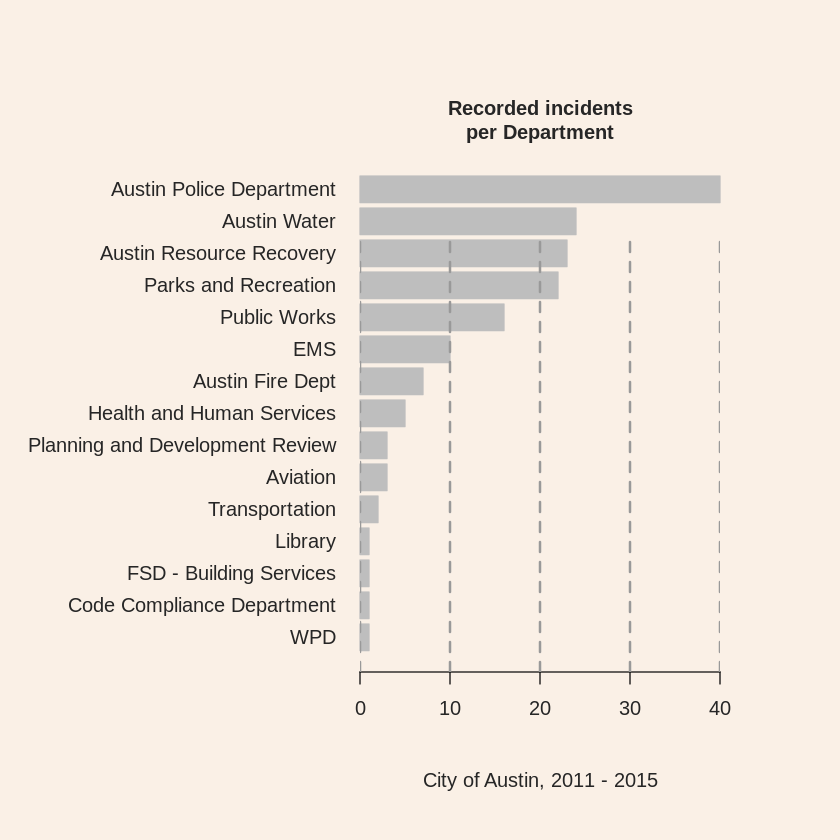

In [133]:
legal$Department <- factor(legal$Department)

# make level name shorter so that it later fits in the graph
levels(legal$Department)[1] <- "WPD"
table <- sort((table(legal$Department, useNA = "ifany")))

# name of table
names(dimnames(table)) <- "Department"

length(table)
addmargins(table)

# adjust margins so that the text on the axis fits in the graph
par(mar = c(7, 15, 10, 5), bg = "linen")
# add bar chart
barplot(table,
    #orientation
        horiz = TRUE,
        las = 1,
        xlim = c(0, max(table(legal$Department))),
        ylim = range(pretty(c(0, legal$Department))),
    #text
        main = "Recorded incidents\nper Department",
        sub = "City of Austin, 2011 - 2015",
    #size
        cex.main = 1,
    #colors
        col.axis = "gray15",
        col.main = "gray15",
        col.sub = "gray15",
        col = "gray",
        border = "gray"
        )
# add grid
grid(nx = NULL, ny = NA, lwd = 2, lty = 2, col = "gray60")

In particular, we can distinguish again that most incidents are recorded in the Austin Police
Department. Next is Austin Water with 24 entries, Austin Resource Recovery with 23, Parks
and Recreation with 22. Then Public Works with 16 entries, EMS with 10, Fire Department
with just 7 and Health and Human Services with 5. A still shorter record of incidents has been made below, so that they have a frequency less than 1 incident per year and by extension have less interest.

In [ ]:
# In the initial dataset the Amount column was of type chr and had a dollar sign that had to be removed.
# remove "$" symbol and turn character to numeric
# legal$Amount <- as.numeric(substring(legal$Amount, 2, nchar(legal$Amount)))
# class(Amount)

A quick summary of the descriptive statistics shows that there is one NA record (ie not available),
so in some case no compensation amount was entered. At the same time, it appears that the
largest compensation amount is $155,000.00, a suspiciously high amount that may be an indication
of a typographical error or a very special and rare case. As this amount affects the average quite
a bit and it is possible to have falsified results, we will make some modifications, in order to have
as correct and accurate results as possible.


In [134]:
summary(legal$Amount)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    50.0    587.3   1235.7   3643.2   3182.4 155000.0        1 

First, regarding the unavailable value, we replace it with the median of the compensation
amounts, so that it does not hinder our calculations. Since there are suspiciously high values and
the mean deviates a lot from the median, we conclude that the distribution of the data is skewed,
and for this reason it is preferable to replace with the median rather than the mean. For the
$155,000.00 (and other suspiciously high amounts that may exist), we will replace any outliers
that exist with Tukey's rule, whereby we replace values that deviate from 75% with the median of
observations as much as 1.5 times the intra-quarter range of amounts. It is worth noting that
according to the rule extreme values are also considered those that are 1.5 times the interquartile
range away from 25% of the observations. This notional margin is labeled as "Tukey's fences", but
in this case we will not use the second fence at all, as there are no negative values at all and no
negative values are meant to be in claim amounts (no one is claiming negative compensation,
below zero) .


In [135]:
#NA treatment
legal$Amount[is.na(legal$Amount)] <- median(legal$Amount, na.rm = TRUE)

#outlier treatment
Q3 <- unname(quantile(legal$Amount)[4])
outliers <- which(legal$Amount > Q3 + 1.5 * IQR(legal$Amount))
for(i in 1:length(legal$Amount[outliers])){
  legal$Amount[outliers][i] <- median(legal$Amount)
}

summary(legal$Amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   50.0   588.2  1235.7  1651.1  1991.4  7000.0 

After the modifications we can see in principle that the mean (1651.1) is now very little deviation from the
median (1235.7) and, furthermore, that overall and on average the largest amounts are found in the 00 Auto
category with a total amount 239,726.7…

In [136]:
which.max(tapply(legal$Amount, legal$Category, sum))
tapply(legal$Amount, legal$Category, sum)["00 Auto"]

00 Auto 
      1

00 Auto 
239726.7

…and an average of $1,887.61.


In [138]:
which.max(tapply(legal$Amount, legal$Category, mean))
tapply(legal$Amount, legal$Category, mean)["00 Auto"]

00 Auto 
      1

00 Auto 
1887.612

Naturally, the amount of $155,000.00 would significantly change the results in terms of both the total and the
average, and we would conclude directly.


### Text analysis

Since we also have the names of each injured person at our disposal, we can also see the
frequency of occurrence of a (baptismal) name in the list of people who have requested
compensation from the city. Some of the names at a glance are as follows:


In [140]:
head(Claim.Name,35)

[1] "Valdez, Michael"                               
 [2] "Caballero, Rosita"                             
 [3] "Castillo, Angela"                              
 [4] "Cutean, Nicki"                                 
 [5] "Ferrovial/ Toyota Lease Trust"                 
 [6] "Hardwick, Andrew"                              
 [7] "Hardy, Ryan"                                   
 [8] "Henna Chevrolet"                               
 [9] "Hertz (Hardy)"                                 
[10] "Kempter, Anne"                                 
[11] "Kenyon, Rachel"                                
[12] "Lopez de Araya Bengoa, Imanol (MINOR INVOLVED)"
[13] "Scott, Nadia"                                  
[14] "Aleman, Nelda"                                 
[15] "Blair, Jackie"                                 
[16] "Grays, Jessica"                                
[17] "Katz, Lauren"                                  
[18] "Rayburn, Charles"                              
[19] "USAA (Butler, Bill)"                           
[20] "Allstate (Pitts)"                              
[21] "AT&T (150280)"                                 
[22] "AT&T (150480)"                                 
[23] "Dawson, Jennifer"                              
[24] "Reed Hawkins, Tam"                             
[25] "Rodriguez, Gina"                               
[26] "Saucedo, Blondena"                             
[27] "Texas Gas (150257)"                            
[28] "Seton (Brackenridge)"                          
[29] "Stringer, John"                                
[30] "Guo, Sue"                                      
[31] "Washington, Cynthia"                           
[32] "Garcia, Miranda"                               
[33] "Goodall, Jannette"                             
[34] "Herbert, Robert"                               
[35] "Martinez, Rudy"

As can be seen there is no clear consistent structure. In a single column are the first name,
last name and various notes. Sometimes, when it comes to the involvement of a minor or when it comes to NPIDs. We need to "pull" the baptismal names, which, however, differ in
position (they can be inside a parenthesis) and in length (one name can be very short, while
another is longer and therefore we cannot set from scratch how many characters will we draw
from the table. What seems to be common in all the entries is that whenever there is a first
name, there is a comma, then a blank, and then there is a first name. So we will take advantage
of it pattern "comma, space, chargroup(name)" to isolate each group of characters preceded
by these.

Checking the table of names as a whole, it becomes apparent that there are still some minor
exceptions. The word "Inc" also appears in the names, as well as excluding some names that
do not follow a comma and a space, but the word "and", because it is a couple with another
name.

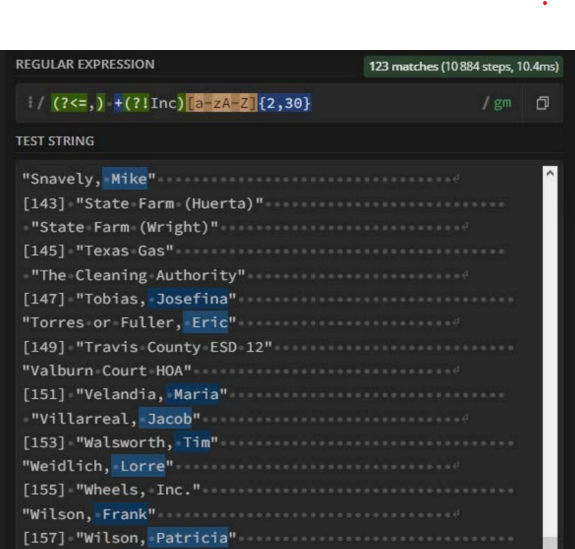

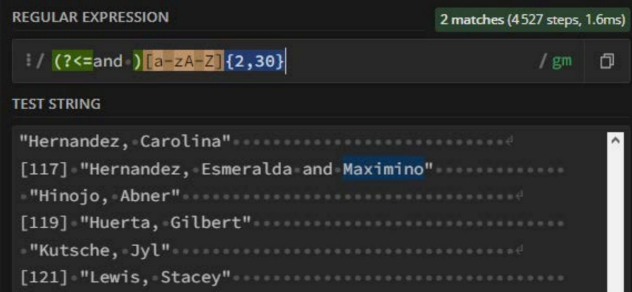

Finally, using "regular expressions" we ask the program to return us a group of characters
(uppercase or lowercase) from A to Z with a length of at least 2 characters (for the shortest
possible name) and up to 30 characters. This group must be followed by the comma symbol
and then one or more spaces and must not be the word "Inc".


In [143]:
list1 <- regmatches(legal$Claim.Name, regexpr("(?<=,) +(?!Inc)[a-zA-Z]{2,30}", legal$Claim.Name, perl=TRUE))
list1

[1] " Michael"   " Rosita"    " Angela"    " Nicki"     " Andrew"   
  [6] " Ryan"      " Anne"      " Rachel"    " Imanol"    " Nadia"    
 [11] " Nelda"     " Jackie"    " Jessica"   " Lauren"    " Charles"  
 [16] " Bill"      " Jennifer"  " Tam"       " Gina"      " Blondena" 
 [21] " John"      " Sue"       " Cynthia"   " Miranda"   " Jannette" 
 [26] " Robert"    " Rudy"      " Rebecca"   " Raymond"   " Laurel"   
 [31] " Bob"       " Dorcas"    " Christie"  " Daniel"    " Max"      
 [36] " Sapna"     " Cassandra" " Debra"     " Brian"     " Jennifer" 
 [41] " Aditya"    " Catina"    " Laura"     " Danielle"  " Katrina"  
 [46] " Dylan"     " Mauricio"  " James"     " Nick"      " Mike"     
 [51] " Paul"      " Jennifer"  " Raymond"   " Maureen"   " Jon"      
 [56] " Gilbert"   " Lisa"      " Kristy"    " Juan"      " Eduardo"  
 [61] " Anna"      " Ana"       " Maria"     " Stephanie" " Craig"    
 [66] " Nicole"    " Matthew"   " Orlando"   " Ellen"     " William"  
 [71] " Robert"    " Dennis"    " Marley"    " Ronnie"    " Marissa"  
 [76] " Jessica"   " Delia"     " Bonnie"    " Andre"     " Brien"    
 [81] " Paula"     " Alfredo"   " Sheri"     " Jesse"     " Debra"    
 [86] " Nicole"    " Husain"    " Jose"      " Mary"      " William"  
 [91] " Carolina"  " Esmeralda" " Abner"     " Gilbert"   " Jyl"      
 [96] " Stacey"    " Nancy"     " Maricela"  " Alan"      " Luis"     
[101] " Bianca"    " Laura"     " Odalys"    " Patrick"   " Fernando" 
[106] " Dolores"   " Jonathan"  "  Sean"     " Matthew"   " Phillip"  
[111] " Diana"     " Pauline"   " Mike"      " Josefina"  " Eric"     
[116] " Maria"     " Jacob"     " Tim"       " Lorre"     " Frank"    
[121] " Patricia"  " Tim"       " Sean"

Now we have ended up with a list of names that still have a blank in front of them.
The process is repeated asking for characters only.


In [144]:
list1 <- regmatches(list1, regexpr("[a-zA-Z]{2,30}", list1, perl = TRUE))
list1

[1] "Michael"   "Rosita"    "Angela"    "Nicki"     "Andrew"    "Ryan"     
  [7] "Anne"      "Rachel"    "Imanol"    "Nadia"     "Nelda"     "Jackie"   
 [13] "Jessica"   "Lauren"    "Charles"   "Bill"      "Jennifer"  "Tam"      
 [19] "Gina"      "Blondena"  "John"      "Sue"       "Cynthia"   "Miranda"  
 [25] "Jannette"  "Robert"    "Rudy"      "Rebecca"   "Raymond"   "Laurel"   
 [31] "Bob"       "Dorcas"    "Christie"  "Daniel"    "Max"       "Sapna"    
 [37] "Cassandra" "Debra"     "Brian"     "Jennifer"  "Aditya"    "Catina"   
 [43] "Laura"     "Danielle"  "Katrina"   "Dylan"     "Mauricio"  "James"    
 [49] "Nick"      "Mike"      "Paul"      "Jennifer"  "Raymond"   "Maureen"  
 [55] "Jon"       "Gilbert"   "Lisa"      "Kristy"    "Juan"      "Eduardo"  
 [61] "Anna"      "Ana"       "Maria"     "Stephanie" "Craig"     "Nicole"   
 [67] "Matthew"   "Orlando"   "Ellen"     "William"   "Robert"    "Dennis"   
 [73] "Marley"    "Ronnie"    "Marissa"   "Jessica"   "Delia"     "Bonnie"   
 [79] "Andre"     "Brien"     "Paula"     "Alfredo"   "Sheri"     "Jesse"    
 [85] "Debra"     "Nicole"    "Husain"    "Jose"      "Mary"      "William"  
 [91] "Carolina"  "Esmeralda" "Abner"     "Gilbert"   "Jyl"       "Stacey"   
 [97] "Nancy"     "Maricela"  "Alan"      "Luis"      "Bianca"    "Laura"    
[103] "Odalys"    "Patrick"   "Fernando"  "Dolores"   "Jonathan"  "Sean"     
[109] "Matthew"   "Phillip"   "Diana"     "Pauline"   "Mike"      "Josefina" 
[115] "Eric"      "Maria"     "Jacob"     "Tim"       "Lorre"     "Frank"    
[121] "Patricia"  "Tim"       "Sean"

Then it does not fail to include in the names (groups of characters) and those that follow the
"and (blank)" pattern, so that we end up with a complete table.


In [145]:
list2 <- regmatches(legal$Claim.Name, regexpr("(?<=and )[a-zA-Z]{2,30}", legal$Claim.Name, perl=TRUE))
list2

firstnames <- factor(c(list1, list2))

[1] "Marilu"   "Maximino"

In the end the names total 110, compared to the 159 records we know to exist. As long as
we know that any of them are repeated, we proceed to find the name with the highest
frequency of occurrence.


In [146]:
nlevels(firstnames)

[1] 110

This name is 'Jennifer' and has appeared in the records only 3 times. Below we can see
that each time it is a different person and therefore combined with the frequency of occurrence
it is just a coincidence.


In [147]:
which.max(table(firstnames))
table(firstnames)["Jennifer"]
legal$Claim.Name[grep("Jennifer", legal$Claim.Name)]

Jennifer 
      48

Jennifer 
       3

[1] "Dawson, Jennifer"   "Burrough, Jennifer" "Liu, Jennifer"